## Exploratory Data Analysis (EDA) notebook

### Imports and path resolution

In [5]:
# ---------------------------------------------------------------------
# Setup: ensure imports work no matter where the notebook is run from
# ---------------------------------------------------------------------

from pathlib import Path
import os, sys

# If current working directory os <project>/notebooks ... 
if Path.cwd().name == "notebooks":
    
    # ... go up one level to <project> so that relative paths work
    os.chdir(Path.cwd().parent)

# Add  the project root to sys.path so "src.*" modules can be resolved
sys.path.insert(0, str(Path.cwd()))

# Project EDA helpers (load data + eda class)
from src.eda.load_gold_data import load_gold_happiness_data
from src.eda.explore_gold_data import EDAConfig, EDAExplorer

# Common libraries used for analysis and plotting
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Load gold dataset

In [6]:
# ---------------------------------------------------------------------
# Load the engineered Gold dataset
# ---------------------------------------------------------------------

# Loads 'world_happiness_gold.csv' to DataFrame
gold_df = load_gold_happiness_data(verbose=True)

📄 Loaded gold data [world_happiness_gold.csv]: 2035 rows x 10 cols


### Configure EDA (save figures to `artifacts/`)

In [7]:
# ---------------------------------------------------------------------
# Configure EDA behaviour and create an explorer instance
# ---------------------------------------------------------------------

# EDAConfig controls Seaborn styling and figure output
cfg = EDAConfig(save_dir=Path("artifacts"), use_theme=True, fig_dpi=110)

# EDAExplorer wraps common summaries/plots and keeps the DataFrame immutable
eda = EDAExplorer(gold_df, config=cfg)

### Quick looks

In [8]:
# ---------------------------------------------------------------------
# Quick “shape & feel” pass
# ---------------------------------------------------------------------

# Head/tail snapshot; console=False returns rich notebook display
eda.preview(n=5, console=False)

# Dataset overview: shape, data types, and memory usage
eda.info()

# Numeric summary statistics
eda.describe_numeric(console=False)

# Top-k value counts for the categorical variables
eda.describe_categorical(top_n=3, console=False)


First 5 rows



,country_name,freedom_to_make_life_choices,generosity,healthy_life_expectancy,ladder_score,logged_gdp_per_capita,perceptions_of_corruption,regional_indicator,social_support,year
0,Afghanistan,0.718,0.168,50.80,3.724,7.370,0.882,South Asia,0.451,2008
1,Afghanistan,0.679,0.190,51.20,4.402,7.540,0.850,South Asia,0.552,2009
2,Afghanistan,0.600,0.121,51.60,4.758,7.647,0.707,South Asia,0.539,2010
3,Afghanistan,0.496,0.162,51.92,3.832,7.620,0.731,South Asia,0.521,2011
4,Afghanistan,0.531,0.236,52.24,3.783,7.705,0.776,South Asia,0.521,2012



Last 5 rows



,country_name,freedom_to_make_life_choices,generosity,healthy_life_expectancy,ladder_score,logged_gdp_per_capita,perceptions_of_corruption,regional_indicator,social_support,year
2030,Zimbabwe,0.753,-0.098,55.000,3.638,8.016,0.751,Sub-Saharan Africa,0.754,2017
2031,Zimbabwe,0.763,-0.068,55.600,3.616,8.049,0.844,Sub-Saharan Africa,0.775,2018
2032,Zimbabwe,0.632,-0.064,56.200,2.694,7.950,0.831,Sub-Saharan Africa,0.759,2019
2033,Zimbabwe,0.643,-0.009,56.800,3.160,7.829,0.789,Sub-Saharan Africa,0.717,2020
2034,Zimbabwe,0.677,-0.047,56.201,3.145,7.943,0.821,Sub-Saharan Africa,0.750,2021



Shape:

(2035, 10)

Dtypes:
country_name                     object
freedom_to_make_life_choices    float64
generosity                      float64
healthy_life_expectancy         float64
ladder_score                    float64
logged_gdp_per_capita           float64
perceptions_of_corruption       float64
regional_indicator               object
social_support                  float64
year                              int64
dtype: object

Memory usage: 0.37 MB



,count,mean,std,min,25%,50%,75%,max
freedom_to_make_life_choices,2035.0,0.748757,0.139180,0.258,0.656,0.7700,0.8610,0.985
generosity,2028.0,-0.002227,0.161610,-0.335,-0.118,-0.0290,0.0890,0.698
healthy_life_expectancy,2003.0,63.714845,7.351912,32.300,59.260,65.4000,68.8700,77.100
ladder_score,2035.0,5.490948,1.107523,2.375,4.669,5.4200,6.2980,8.019
logged_gdp_per_capita,2028.0,9.392839,1.139718,6.635,8.484,9.4875,10.3715,11.648
perceptions_of_corruption,2009.0,0.740271,0.188834,0.035,0.682,0.7980,0.8680,0.983
social_support,2035.0,0.815003,0.116050,0.291,0.751,0.8360,0.9065,0.987
year,2035.0,2013.826536,4.514250,2005.000,2010.000,2014.0000,2018.0000,2021.000


,column,value,count
0,country_name,Argentina,16
1,country_name,Bolivia,16
2,country_name,Brazil,16
3,regional_indicator,Sub-Saharan Africa,426
4,regional_indicator,Latin America and Caribbean,299
5,regional_indicator,Western Europe,292


### Data quality and distributions

Saved: artifacts\missing.png


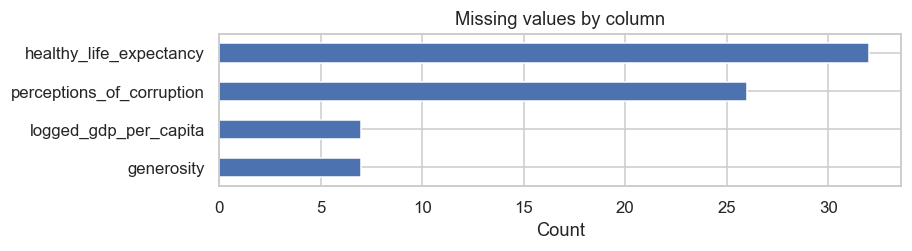

Saved: artifacts\histograms.png


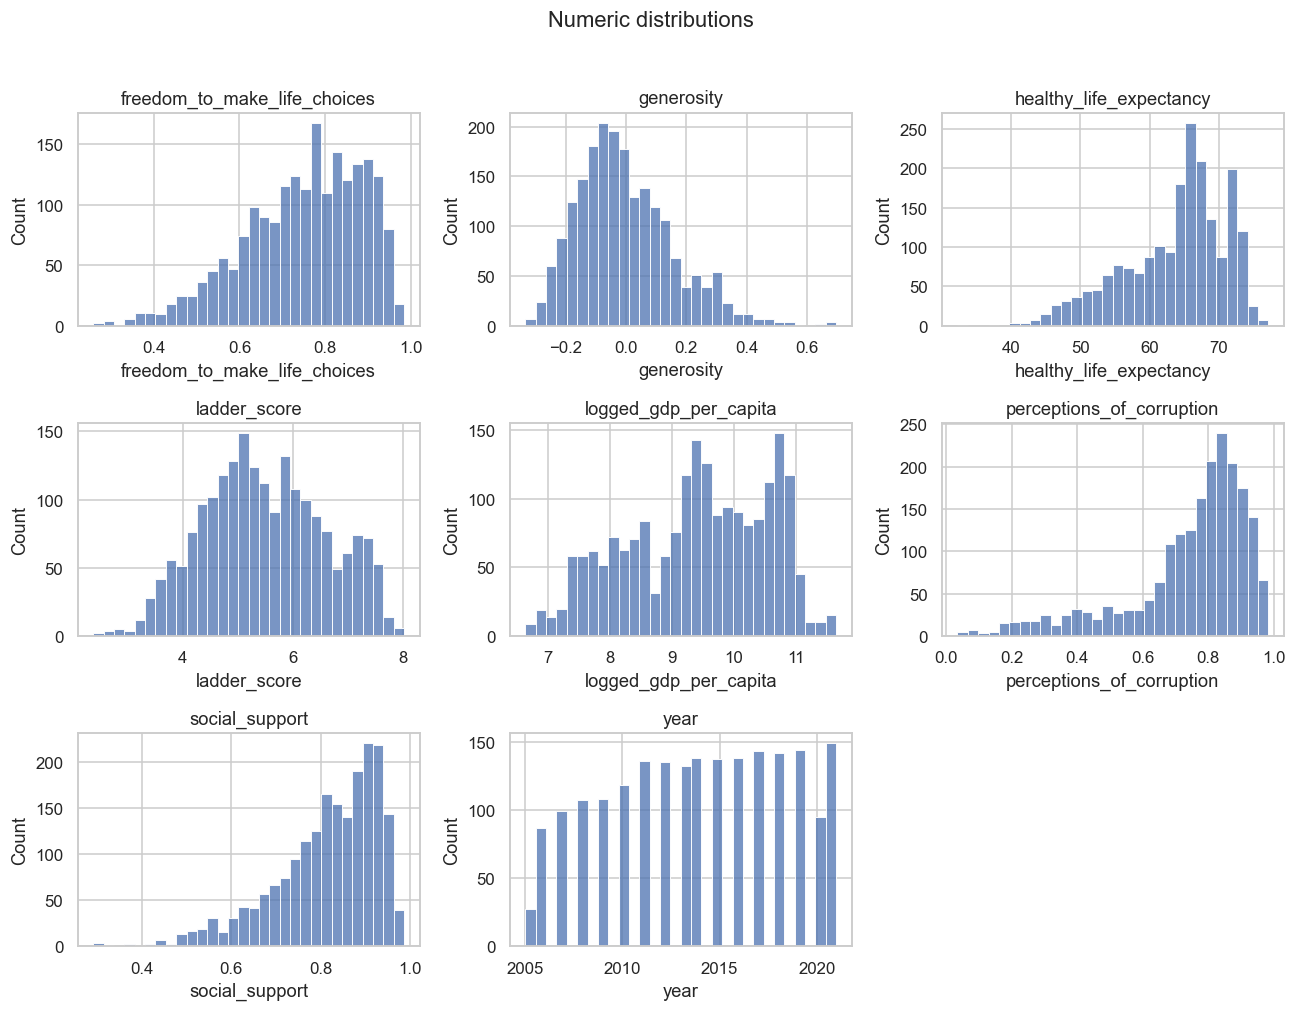

Saved: artifacts\boxplots.png


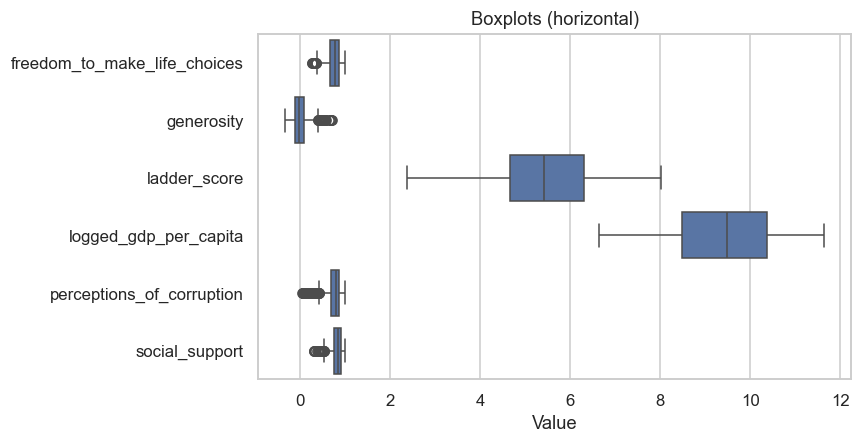

In [9]:
# ---------------------------------------------------------------------
# Data quality & distributions
# ---------------------------------------------------------------------

# Missingess: with plot=True, display and save a barplot of missing values
eda.missing(plot=True)

# Histograms of numeric features
eda.histograms(bins=30, exclude="year")

# Horizontal barplot used for outlier detection
eda.boxplots(exclude=["healthy_life_expectancy", "year"])

### Relationships

Saved: artifacts\correlations_pearson.png


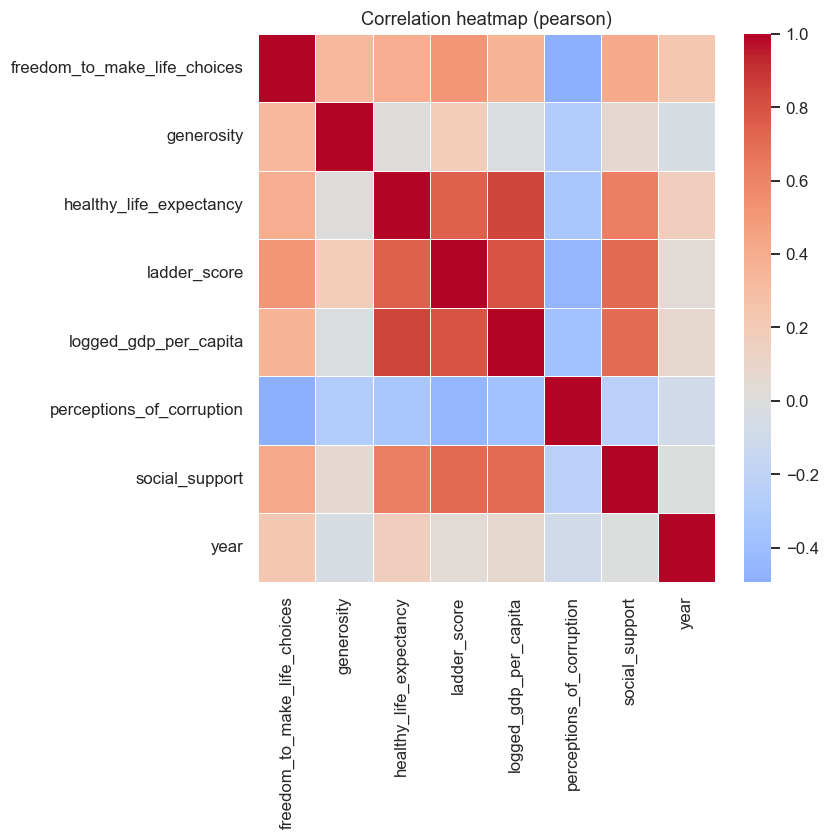

In [10]:
# ---------------------------------------------------------------------
# Relationships
# ---------------------------------------------------------------------

# Correlation heatmap using Pearson's r
eda.correlations(method="pearson", top_k=15)